In [7]:
import numpy as np
import pandas as pd 
from scipy.special import expit
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("data/train_lr.csv")
valid = pd.read_csv("data/valid_lr.csv")
test = pd.read_csv("data/test_lr.csv")

In [ ]:
X_train = np.array(train.iloc[:, :10000])
y_train = np.array(train['target'])
X_valid = np.array(valid.iloc[:, :10000])
y_valid = np.array(valid['target'])
X_test = np.array(test)

In [ ]:
loss_BGD = []
loss_BGD_valid = []
c_reg = 0.01
stepsize = 0.001
# y = y.reshape(6000)

In [ ]:
w = np.zeros(10000)
s = expit(np.dot(X_train, w))
J = -np.dot(y_train.T, np.log(s)) - np.dot((1-y_train).T, np.log(1-s)) + c_reg * np.dot(w.T, w)
s_v = expit(np.dot(X_valid, w))
J_v = -np.dot(y_valid.T, np.log(s_v)) - np.dot((1-y_valid).T, np.log(1-s_v)) + c_reg * np.dot(w.T, w)
loss_BGD.append(J)
loss_BGD_valid.append(J_v)

NameError: name 'np' is not defined

In [ ]:
for epoch in range(5000):
    w = w + stepsize * np.dot(X_train.T, (y_train - s)) - 2*stepsize*c_reg*w
    s = expit(np.dot(X_train, w))
    s_v = expit(np.dot(X_valid, w))
    J = -np.dot(y_train.T, np.log(s+1e-30)) - np.dot((1-y_train).T, np.log(1-s+1e-30)) + c_reg * np.dot(w.T, w)
    J_v = -np.dot(y_valid.T, np.log(s_v+1e-30)) - np.dot((1-y_valid).T, np.log(1-s_v+1e-30)) + c_reg * np.dot(w.T, w)
    loss_BGD.append(J)
    loss_BGD_valid.append(J_v)

3634.8210204707284


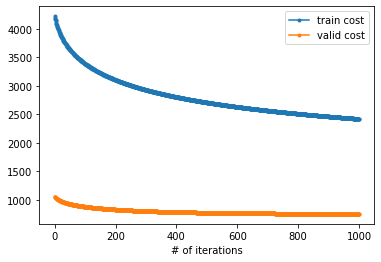

In [ ]:
x = range(1001)
plt.plot(x, loss_BGD, label = 'train cost', marker = '.')
plt.plot(x, loss_BGD_valid, label = 'valid cost', marker = '.')
plt.xlabel('# of iterations')
plt.legend()
plt.show()

In [ ]:
print(loss_BGD[1000])
print(loss_BGD_valid[1000])

IndexError: list index out of range